In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from keras.models import Sequential
from keras.layers import Dense

Read MNIST data with pandas.

In [13]:
train = pd.read_csv('../MNIST_data/train.csv', nrows=2000)

In [14]:
train.shape

(2000, 785)

MNIST train dataset has 42,000 samples. Each row consists of the digit to be predicted in the first column and flattened 28x28 greysale photo into 784 columns.

Shift pixels to between -1 and 1, zero centred.

In [15]:
pixels = (train.iloc[:, 1:] - 128) / 256

In [16]:
labels = train.iloc[:, 0]

Sneak peek of the first 5 digits.

In [17]:
labels.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

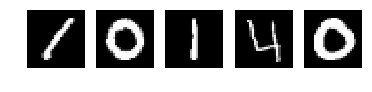

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=5)
for ax_id, ax in enumerate(axs):
    ax.imshow(train.iloc[ax_id, 1:].values.reshape((28, 28)), cm.gray)
    ax.set_axis_off()

In [19]:
label_onehot = np.zeros((pixels.shape[0], 10))
label_onehot[list(range(pixels.shape[0])), labels] = 1
label_onehot[:5]

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [20]:
model = Sequential()

In [21]:
model.add(Dense(1000, input_shape=(784,), use_bias=True, activation='sigmoid'))
model.add(Dense(10, use_bias=True, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
train_size = 1500

In [30]:
model.fit(
    pixels.iloc[:train_size].values,
    label_onehot[:train_size],
    validation_data=(pixels.iloc[train_size:].values, label_onehot[train_size:]),
    epochs=2,
    batch_size=20
)

Train on 1500 samples, validate on 500 samples
Epoch 1/2
1500/1500 [==============================] - 0s - loss: 1.6716 - acc: 0.2240 - val_loss: 0.8041 - val_acc: 0.7220
Epoch 2/2
1500/1500 [==============================

Still recall the first five digits in MNIST dataset are:

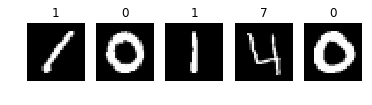

In [38]:
predicts = np.argmax(model.predict(pixels.head().values), axis=1)
fig, axs = plt.subplots(nrows=1, ncols=5)
for ax_id, ax in enumerate(axs):
    ax.imshow(train.iloc[ax_id, 1:].values.reshape((28, 28)), cm.gray)
    ax.set_axis_off()
    ax.set_title(predicts[ax_id])

The titles in the above charts are the predicted digit.